# -- Tips --

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ler conjunto de imagens

In [1]:
from skimage.io import imread_collection

In [55]:
path_database = '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/'
imagens_com_capacete = imread_collection(path_database+'comcapacete/*.png')
imagens_sem_capacete = imread_collection(path_database+'semcapacete/*.png')

In [56]:
imagens_com_capacete.files

['/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/comcapacete/2.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/comcapacete/13.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/comcapacete/14.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/comcapacete/38.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/comcapacete/47.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/comcapacete/50.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/comcapacete/52.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/comcapacete/54.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/comcapacete/55.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/comcapacete/58.png']

In [57]:
imagens_sem_capacete.files

['/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/semcapacete/1.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/semcapacete/8.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/semcapacete/16.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/semcapacete/26.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/semcapacete/34.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/semcapacete/35.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/semcapacete/37.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/semcapacete/42.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/semcapacete/43.png',
 '/Users/romuere/Dropbox/MTAP/databases/database2_raw_data/small_capacete/semcapacete/49.png']

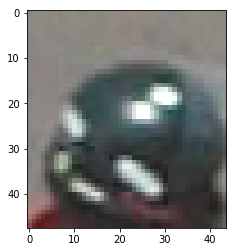

In [58]:
plt.imshow(imagens_com_capacete[0])

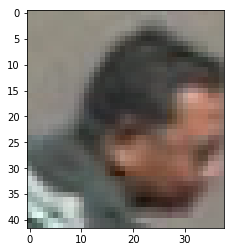

In [59]:
plt.imshow(imagens_sem_capacete[0])

# Calcular tempo de processamento

In [60]:
import time
from skimage.filters import threshold_yen
from skimage.color import rgb2gray
from skimage.restoration import denoise_bilateral 

In [61]:
def faz_algum_processamento_na_imagem(im):
    cinza = rgb2gray(im)
    filtrada = denoise_bilateral(cinza,win_size=9,multichannel=False)
    media = np.mean(filtrada)
    desvio = np.std(filtrada)
    mx = np.max(filtrada)
    mn = np.min(filtrada)
    return [media,desvio,mx,mn]

In [62]:
inicio = time.time()

atributos_cc = np.zeros((len(imagens_com_capacete),4))
for id_im,im in enumerate(imagens_com_capacete):
    atributos_cc[id_im,:] = faz_algum_processamento_na_imagem(im)

fim = time.time()
tempo_processamento = fim-inicio
print(tempo_processamento)

0.03149104118347168


# Processamento em paralelo
- n_jobs -> quantidade de processos em paralelo
- n_jobs = -1 -> utiliza todos os "cores" do processador.

In [63]:
import joblib 

In [66]:
inicio_paralelo = time.time()

atributos_cc_paralelo = joblib.Parallel(n_jobs=-1)(joblib.delayed(faz_algum_processamento_na_imagem)(imagens_com_capacete[nr]) for nr in range(len(imagens_com_capacete)))

fim_paralelo = time.time()
tempo_processamento_paralelo = fim_paralelo-inicio_paralelo
print(tempo_processamento_paralelo)

0.2082078456878662


n_jobs -> quantidade de processos em paralelo
n_jobs = -1 -> utiliza todos os "cores" do processador.


In [72]:
atributos_cc_paralelo

[[0.41013260107983485,
  0.1675790512013214,
  0.9835244762238823,
  0.12035527651965847],
 [0.5612920257901762,
  0.21292120972306627,
  0.9904510092336982,
  0.19778642546196218],
 [0.4381472197690385,
  0.19776034353224814,
  0.9957783681388289,
  0.15683207376722463],
 [0.46381635711025687,
  0.1928088891785426,
  0.9480980556752003,
  0.11685309169678358],
 [0.500697365170333,
  0.21012328603494465,
  0.9947926090920779,
  0.0700326875725446],
 [0.42132670559294094,
  0.16707305930907723,
  0.9645105131591726,
  0.1327336355406371],
 [0.44013223741515134,
  0.14485676378588214,
  0.9767370642900733,
  0.24167738548726903],
 [0.48316630804865335,
  0.15853263947229293,
  0.8333698629183828,
  0.19257445182678729],
 [0.3596359680888822,
  0.19174505846271964,
  0.9219338116721957,
  0.12355570705706813],
 [0.41288343090566226,
  0.2077146891898893,
  0.9980991333705439,
  0.10348316092633539]]

In [73]:
atributos_cc

array([[0.4101326 , 0.16757905, 0.98352448, 0.12035528],
       [0.56129203, 0.21292121, 0.99045101, 0.19778643],
       [0.43814722, 0.19776034, 0.99577837, 0.15683207],
       [0.46381636, 0.19280889, 0.94809806, 0.11685309],
       [0.50069737, 0.21012329, 0.99479261, 0.07003269],
       [0.42132671, 0.16707306, 0.96451051, 0.13273364],
       [0.44013224, 0.14485676, 0.97673706, 0.24167739],
       [0.48316631, 0.15853264, 0.83336986, 0.19257445],
       [0.35963597, 0.19174506, 0.92193381, 0.12355571],
       [0.41288343, 0.20771469, 0.99809913, 0.10348316]])